<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/Parcial_2_2023_06_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

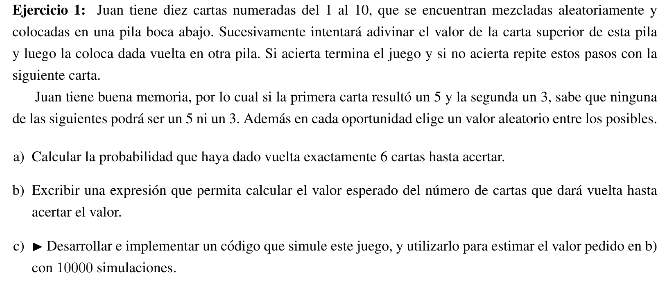

In [2]:
from random import random

def mezclador():
  mazo = list(range(1,11))
  n = len(mazo)
  # for i in range(0,n-1):
  #   j = int(random()*(n-i)) + i
  #   mazo[i], mazo[j] = mazo[j], mazo[i]
  for i in range(n - 1, -1, -1):
    j = int(random()*(i+1))
    mazo[i], mazo[j] = mazo[j], mazo[i]

  return mazo

def juego():
  mazo_mezclado = mezclador()
  n = len(mazo_mezclado)
  for i, carta in enumerate(mazo_mezclado):
    j = int(random()*(n-i)) + i
    # carta_propuesta = mazo_mezclado[j]
    # if carta_propuesta == mazo_mezclado[i]:
    #   return i + 1 # se adivino en la (i+1)-esima iteracion!
    if j == i:
      return i + 1 # se adivino en la (i+1)-esima iteracion!

In [3]:
NUMERO_DE_MUESTRAS = 100_000
muestras = [juego() for _ in range(NUMERO_DE_MUESTRAS)]

esperanza = sum(muestras)/NUMERO_DE_MUESTRAS
print(f"La esperanza es {esperanza}")

La esperanza es 5.49065


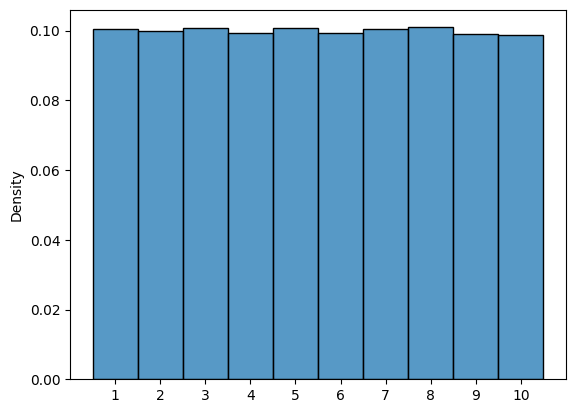

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(muestras, stat='density', discrete=True)
plt.xticks(range(min(muestras), max(muestras) + 1))
plt.show()

# como se ve, tiene distribucion U(1,10). esto as asi ya que P(xi) = P(xj) para todo i,j en [1,...,10]
# y notar que P(x) = 1/10 = 0.10

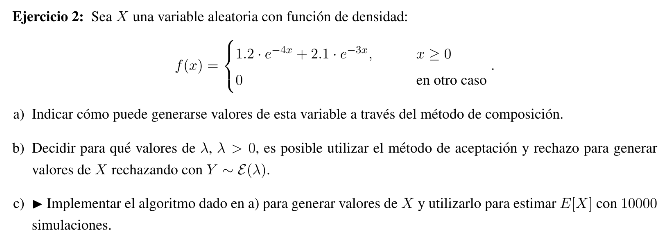

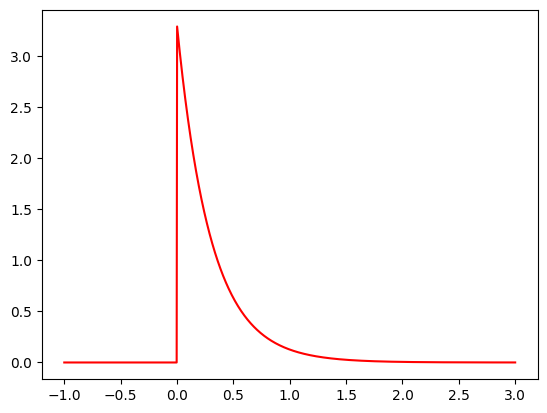

In [5]:
import numpy as np

def f_x(x):
  return 1.2 * np.exp(-4*x) + 2.1 * np.exp(-3*x) if x>=0 else 0

dom = np.linspace(-1, 3, 1000)

f_x_y = [f_x(x) for x in dom]
sns.lineplot(x=dom, y=f_x_y, color='red')
plt.show()

In [6]:
def muestreador_exponencial(l):
  return -np.log(1 - random()) / l

def muestrador_x_composicion():
  if random() < 0.3:
    return muestreador_exponencial(4)
  else:
    return muestreador_exponencial(3)

muestras = [muestrador_x_composicion() for _ in range(NUMERO_DE_MUESTRAS)]
esperanza = sum(muestras) / NUMERO_DE_MUESTRAS
print(esperanza)

0.30794098648538953


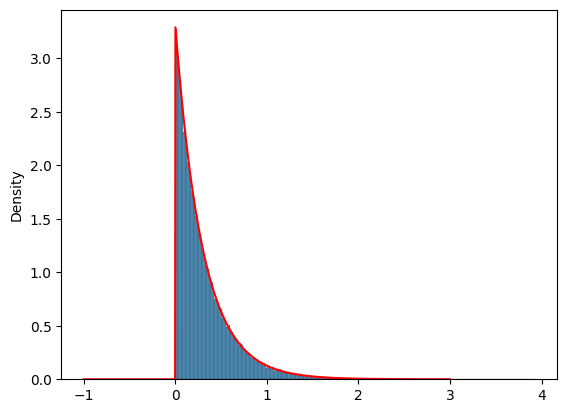

In [7]:
sns.lineplot(x=dom, y=f_x_y, color='red')
sns.histplot(muestras, stat='density')
plt.show()

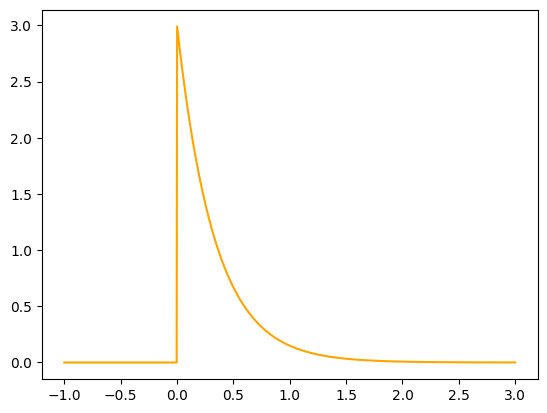

In [8]:
def f_exponencial(x, l):
  return l*np.exp(-l*x) if x>=0 else 0

y = [f_exponencial(x, 3) for x in dom]
sns.lineplot(x=dom, y=y, color='orange')
plt.show()

In [9]:
def muestreador_x_AyR():
  while True:
    muestra = muestreador_exponencial(3)
    p_propuesto = f_exponencial(muestra, 3)
    p_objetivo = f_x(muestra)
    if random() <= p_objetivo/(1.1*p_propuesto):
      return muestra

muestras = [muestreador_x_AyR() for _ in range(NUMERO_DE_MUESTRAS)]
esperanza = sum(muestras) / NUMERO_DE_MUESTRAS
print(esperanza)

0.30909488650896094


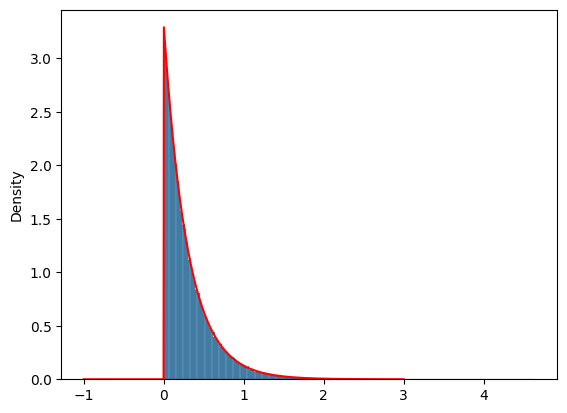

In [10]:
sns.lineplot(x=dom, y=f_x_y, color='red')
sns.histplot(muestras, stat='density')
plt.show()

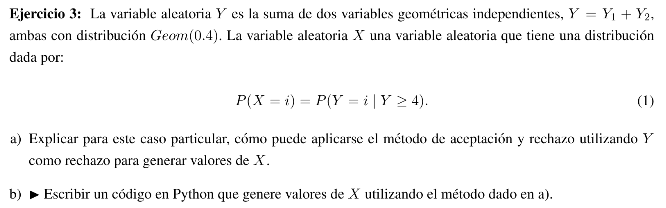

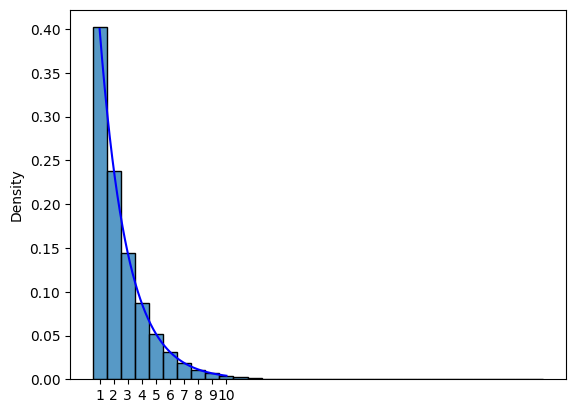

In [32]:
def f_geometrica(x, p):
  return (1 - p)**(x-1) * p

def muestreador_geometrica(p):
  return int( np.log(1-random()) / np.log(1-p) ) + 1

muestras = [muestreador_geometrica(p_geom) for _ in range(NUMERO_DE_MUESTRAS)]

dom = np.linspace(1,10,1000)
p_geom = 0.4
sns.lineplot(x=dom, y=f_geometrica(dom, p_geom), color='blue')
sns.histplot(muestras, stat='density', discrete=True)
plt.xticks(np.arange(1,11,1))
plt.show()

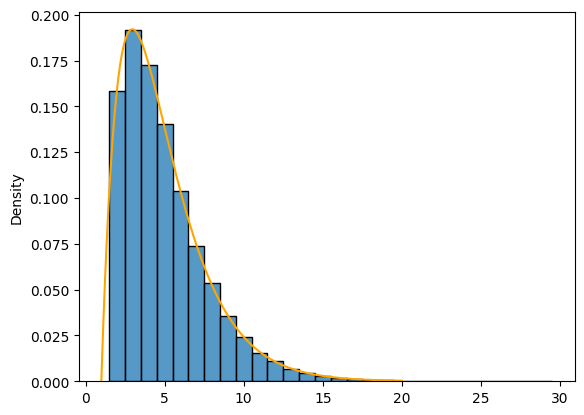

In [36]:
def f_y(x):
  return 0.6**(x-2) * 0.16 * (x-1)

def muestreador_y_simulacion():
  return muestreador_geometrica(p_geom) + muestreador_geometrica(p_geom)

muestras = [muestreador_y_simulacion() for _ in range(NUMERO_DE_MUESTRAS)]
dom = np.linspace(1,20,1000)

sns.lineplot(x=dom, y=f_y(dom), color='orange')
sns.histplot(muestras, stat='density', discrete=True)
plt.show()

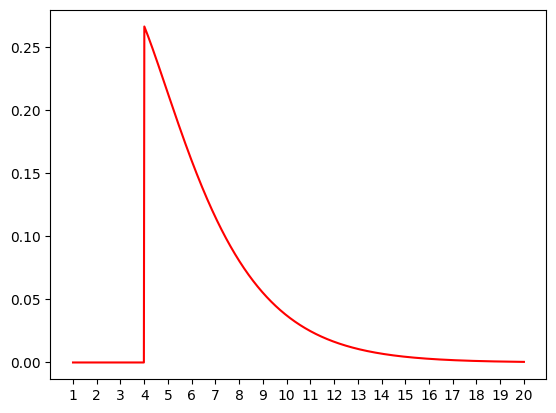

In [47]:
def f_x(x):
  return (0.6**(x-2) * 0.16 * (x-1)) / 0.648 if x>=4 else 0

dom = np.linspace(1,20,1000)
f_x_y = [f_x(x) for x in dom]
sns.lineplot(x=dom, y=f_x_y, color='red')
plt.xticks(np.arange(1,21,1))
plt.show()

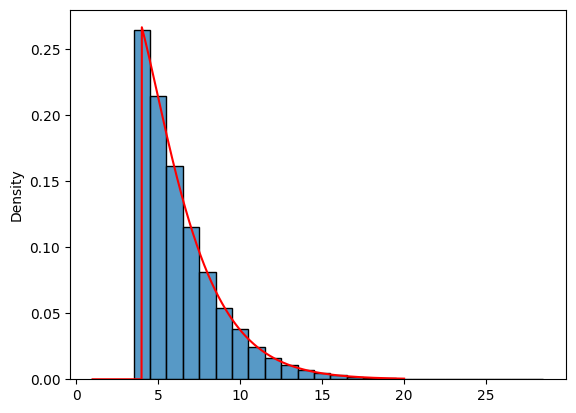

In [48]:
def muestreador_x_AyR():
  while True:
    muestra = muestreador_y_simulacion()
    p_propuesta = f_y(muestra)
    p_objetivo = f_x(muestra)
    if random() < p_objetivo / p_propuesta * (1/0.648):
      return muestra

muestras = [muestreador_x_AyR() for _ in range(NUMERO_DE_MUESTRAS)]

sns.lineplot(x=dom, y=f_x_y, color='red')
sns.histplot(muestras, stat='density', discrete=True)
plt.show()

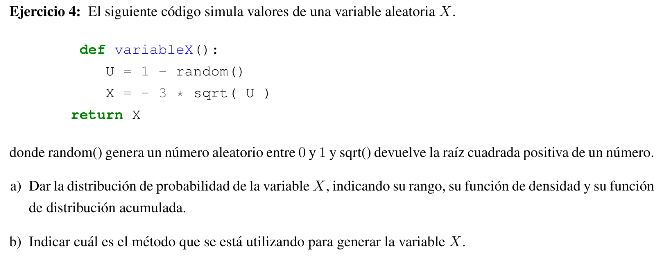